In [38]:

package petFoodDispenser {
    import ScalarValues::*;
    import SI::*;
    
    part def Tank;
    part def Scheduler {
        part screen: Screen;
        part buttons: Button[4..6];
    }

    part def Screen;
    part def Button;
    part def Bowl;
    item def DesiccantBag;
    part def Lid{
        part holder: DesiccantBagHolder;
        item dbag: DesiccantBag;
    }
    part def DesiccantBagHolder;
    
    
    abstract part def DCAdapter {
        part cable: Cable;
    }
    
    part def Cable{
        attribute length: Real;
    }
    
    part def DispenserAdpater:> DCAdapter {
        part redefines cable {
            attribute redefines length = 1.49[m];
        }
    }
}


Package petFoodDispenser (67ee0713-d905-4df9-af73-8fbd9962a740)


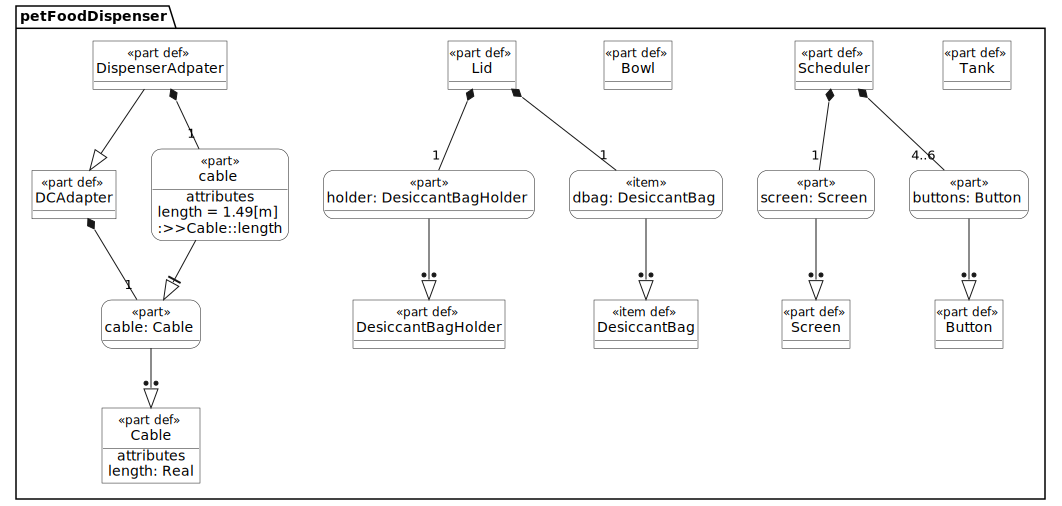

In [39]:
%viz petFoodDispenser

In [89]:
package PDBehaviorV1 {
    import ScalarValues::*;
    
    item def Food;
    action def DispenseFood ;
    action def DispenserOpen {
        in cmd: Integer;
    }
    action def CmdMonitor { out cmd : Integer; }
    action def ManuallyDispenseFood {
        loop action putbutton {
            
            action monitor: CmdMonitor;
            
            then if monitor.cmd >= 1 {
                action open: DispenserOpen {
                    in cmd = monitor.cmd;
                }
            }
        } until putbutton.monitor.cmd < 1;

        then done;
    }
}

Package PDBehaviorV1 (3ee75960-04fd-47a5-b0d4-519f674b8958)


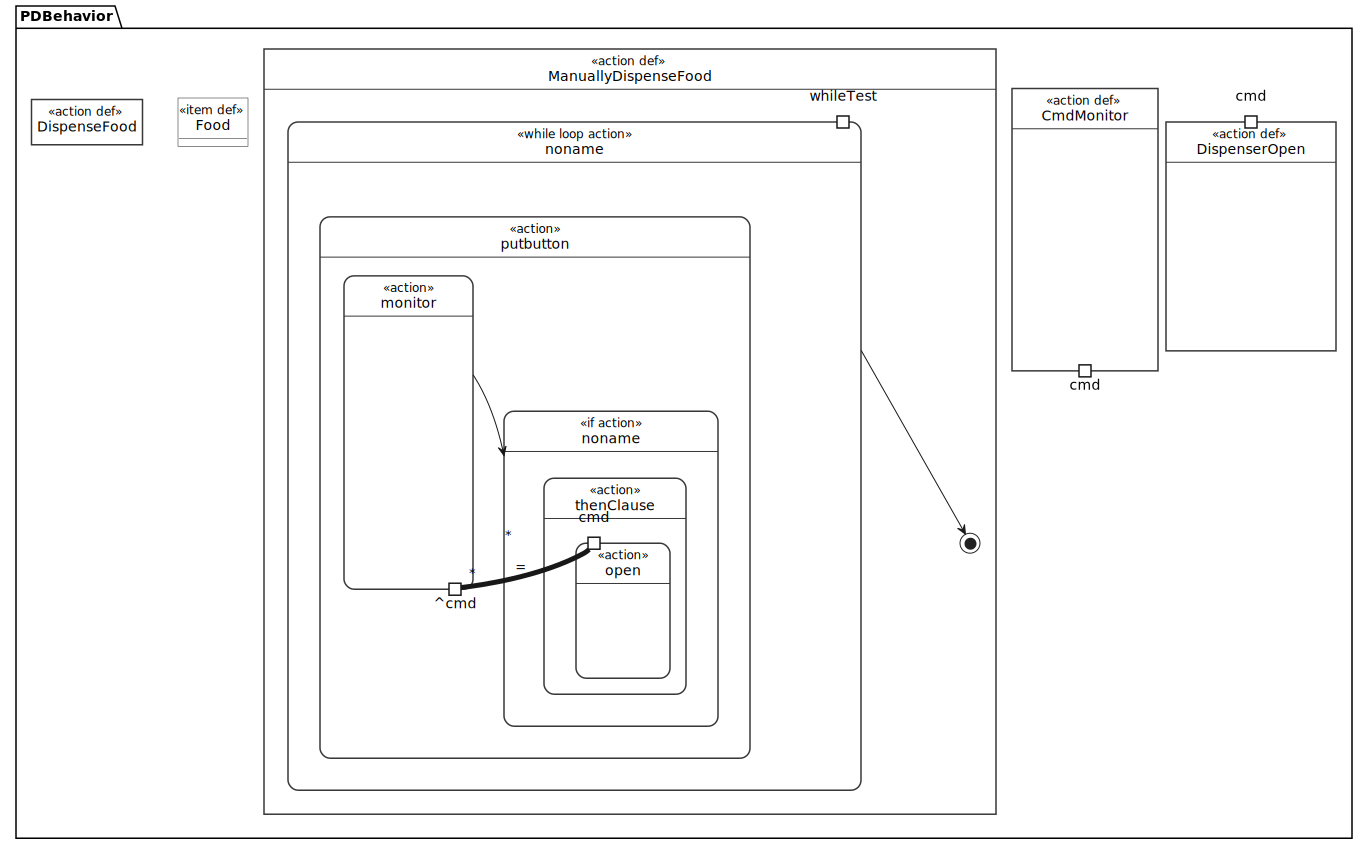

In [90]:
%viz PDBehavior

In [91]:
package PDBehavior {
    import ScalarValues::*;
    
    action ManuallyDispenseFood{
        first start;
    
        then merge continueOpening;
        action def PubButton { out cmd : Integer; }

        then action monitor : PubButton{
            out cmd: Real;
        }

        then decide;
          if monitor.cmd == 1 then open;
          if monitor.cmd == 0 then endOpen;

        action open : DispenserOpen{
            in cmd = monitor.cmd;
        }
        then continueOpening;

        action endOpen :EndOpen;

        then done;

        item def Food;
        action def EndOpen;
        action def DispenserOpen {
            in cmd: Integer;
        }
        
    }

}

Package PDBehavior (6ee3dec5-1c53-4d12-927a-4dd7e153f99d)


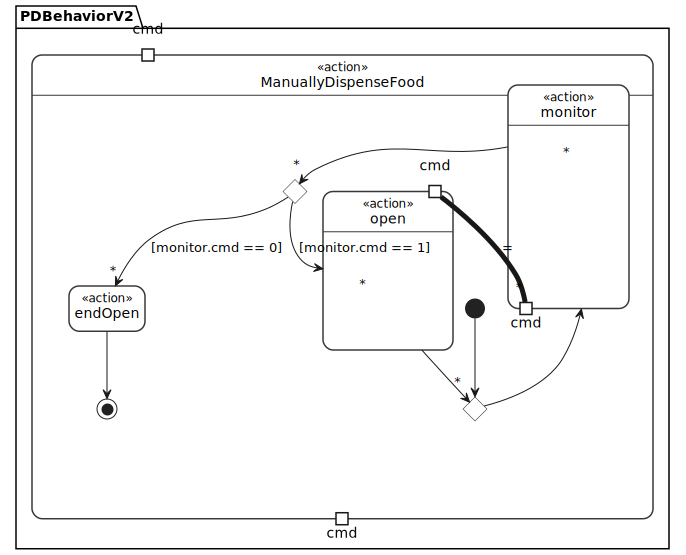

In [92]:
%viz PDBehaviorV2

In [93]:
%export PDBehavior

.

<a download="PDBehavior.json" href="data:application/json;base64,WwogIHsKICAgICJwYXlsb2FkIjogewogICAgICAiQHR5cGUiOiAiTGlicmFyeVBhY2thZ2UiLAogICAgICAiaXNJbXBsaWVkSW5jbHVkZWQiOiBmYWxzZSwKICAgICAgImRlY2xhcmVkTmFtZSI6ICJTY2FsYXJWYWx1ZXMiLAogICAgICAiZWxlbWVudElkIjogIjA0NGI1NjY2LTRjZDQtNGU5NS1hYThkLTdhMjc2NTFiOWU2ZSIsCiAgICAgICJpc0xpYnJhcnlFbGVtZW50IjogdHJ1ZSwKICAgICAgImFsaWFzSWRzIjogW10sCiAgICAgICJxdWFsaWZpZWROYW1lIjogIlNjYWxhclZhbHVlcyIsCiAgICAgICJpc1N0YW5kYXJkIjogdHJ1ZSwKICAgICAgIm5hbWUiOiAiU2NhbGFyVmFsdWVzIgogICAgfSwKICAgICJpZGVudGl0eSI6IHsKICAgICAgIkBpZCI6ICIwNDRiNTY2Ni00Y2Q0LTRlOTUtYWE4ZC03YTI3NjUxYjllNmUiCiAgICB9CiAgfSwKICB7CiAgICAicGF5bG9hZCI6IHsKICAgICAgIkB0eXBlIjogIk5hbWVzcGFjZUltcG9ydCIsCiAgICAgICJzb3VyY2UiOiBbCiAgICAgICAgewogICAgICAgICAgIkBpZCI6ICI2ZWUzZGVjNS0xYzUzLTRkMTItOTI3YS00ZGQ3ZTE1M2Y5OWQiCiAgICAgICAgfQogICAgICBdLAogICAgICAib3duZWRSZWxhdGVkRWxlbWVudCI6IFtdLAogICAgICAiaXNJbXBsaWVkSW5jbHVkZWQiOiBmYWxzZSwKICAgICAgIm93bmluZ1JlbGF0ZWRFbGVtZW50IjogewogICAgICAgICJAaWQiOiAiNmVlM2RlYzUtMWM1My00ZDEyLTkyN2EtNGRkN2UxNTNmOTlkIgogICAgICB9LAogICAgICAiaXNSZWN1cnNpdmUiOiBmYWxzZSwKICAgICAgImVsZW1lbnRJZCI6ICI0ODE3Y2E4Mi0yOWRlLTQ2ZjgtYTNkOC1kNGYwM2RjYmI4MDgiLAogICAgICAidGV4dHVhbFJlcHJlc2VudGF0aW9uIjogW10sCiAgICAgICJpc0xpYnJhcnlFbGVtZW50IjogZmFsc2UsCiAgICAgICJvd25lZEVsZW1lbnQiOiBbXSwKICAgICAgIm93bmVkQW5ub3RhdGlvbiI6IFtdLAogICAgICAiaXNJbXBsaWVkIjogZmFsc2UsCiAgICAgICJhbGlhc0lkcyI6IFtdLAogICAgICAidmlzaWJpbGl0eSI6ICJwdWJsaWMiLAogICAgICAib3duZWRSZWxhdGlvbnNoaXAiOiBbXSwKICAgICAgImRvY3VtZW50YXRpb24iOiBbXSwKICAgICAgImltcG9ydGVkRWxlbWVudCI6IHsKICAgICAgICAiQGlkIjogIjA0NGI1NjY2LTRjZDQtNGU5NS1hYThkLTdhMjc2NTFiOWU2ZSIKICAgICAgfSwKICAgICAgInRhcmdldCI6IFsKICAgICAgICB7CiAgICAgICAgICAiQGlkIjogIjA0NGI1NjY2LTRjZDQtNGU5NS1hYThkLTdhMjc2NTFiOWU2ZSIKICAgICAgICB9CiAgICAgIF0sCiAgICAgICJyZWxhdGVkRWxlbWVudCI6IFsKICAgICAgICB7CiAgICAgICAgICAiQGlkIjogIjZlZTNkZWM1LTFjNTMtNGQxMi05MjdhLTRkZDdlMTUzZjk5ZCIKICAgICAgICB9LAogICAgICAgIHsKICAgICAgICAgICJAaWQiOiAiMDQ0YjU2NjYtNGNkNC00ZTk1LWFhOGQtN2EyNzY1MWI5ZTZlIgogICAgICAgIH0KICAgICAgXSwKICAgICAgImltcG9ydE93bmluZ05hbWVzcGFjZSI6IHsKICAgICAgICAiQGlkIjogIjZlZTNkZWM1LTFjNTMtNGQxMi05MjdhLTRkZDdlMTUzZjk5ZCIKICAgICAgfSwKICAgICAgImlzSW1wb3J0QWxsIjogZmFsc2UsCiAgICAgICJpbXBvcnRlZE5hbWVzcGFjZSI6IHsKICAgICAgICAiQGlkIjogIjA0NGI1NjY2LTRjZDQtNGU5NS1hYThkLTdhMjc2NTFiOWU2ZSIKICAgICAgfQogICAgfSwKICAgICJpZGVudGl0eSI6IHsKICAgICAgIkBpZCI6ICI0ODE3Y2E4Mi0yOWRlLTQ2ZjgtYTNkOC1kNGYwM2RjYmI4MDgiCiAgICB9CiAgfSwKICB7CiAgICAicGF5bG9hZCI6IHsKICAgICAgImlzU3VmZmljaWVudCI6IGZhbHNlLAogICAgICAiaXNMaWJyYXJ5RWxlbWVudCI6IHRydWUsCiAgICAgICJpc1BvcnRpb24iOiBmYWxzZSwKICAgICAgImlzUmVhZE9ubHkiOiBmYWxzZSwKICAgICAgImlzVmFyaWF0aW9uIjogZmFsc2UsCiAgICAgICJkZWNsYXJlZE5hbWUiOiAic3RhcnQiLAogICAgICAiaXNSZWZlcmVuY2UiOiBmYWxzZSwKICAgICAgImFsaWFzSWRzIjogW10sCiAgICAgICJpc0Fic3RyYWN0IjogZmFsc2UsCiAgICAgICJpc0Nvbmp1Z2F0ZWQiOiBmYWxzZSwKICAgICAgImlzVW5pcXVlIjogdHJ1ZSwKICAgICAgImlzT3JkZXJlZCI6IGZhbHNlLAogICAgICAiZWxlbWVudElkIjogIjhmMzgyZTllLTA5NWUtNDAxZS1iNjExLTI1ODdiOTJhMjVlMiIsCiAgICAgICJpc0Rlcml2ZWQiOiBmYWxzZSwKICAgICAgInF1YWxpZmllZE5hbWUiOiAiQWN0aW9uczo6QWN0aW9uOjpzdGFydCIsCiAgICAgICJpc0VuZCI6IGZhbHNlLAogICAgICAiaXNDb21wb3NpdGUiOiB0cnVlLAogICAgICAibmFtZSI6ICJzdGFydCIsCiAgICAgICJAdHlwZSI6ICJBY3Rpb25Vc2FnZSIsCiAgICAgICJpc0luZGl2aWR1YWwiOiBmYWxzZSwKICAgICAgImlzSW1wbGllZEluY2x1ZGVkIjogZmFsc2UsCiAgICAgICJpc05vbnVuaXF1ZSI6IGZhbHNlCiAgICB9LAogICAgImlkZW50aXR5IjogewogICAgICAiQGlkIjogIjhmMzgyZTllLTA5NWUtNDAxZS1iNjExLTI1ODdiOTJhMjVlMiIKICAgIH0KICB9LAogIHsKICAgICJwYXlsb2FkIjogewogICAgICAiQHR5cGUiOiAiTWVtYmVyc2hpcCIsCiAgICAgICJzb3VyY2UiOiBbCiAgICAgICAgewogICAgICAgICAgIkBpZCI6ICI1MTcwOTM2OC05NWZjLTQzNzgtODdmMC02NzE0MWQ2MzZmN2YiCiAgICAgICAgfQogICAgICBdLAogICAgICAib3duZWRSZWxhdGVkRWxlbWVudCI6IFtdLAogICAgICAibWVtYmVyRWxlbWVudElkIjogIjhmMzgyZTllLTA5NWUtNDAxZS1iNjExLTI1ODdiOTJhMjVlMiIsCiAgICAgICJpc0ltcGxpZWRJbmNsdWRlZCI6IGZhbHNlLAogICAgICAib3duaW5nUmVsYXRlZEVsZW1lbnQiOiB7CiAgICAgICAgIkBpZCI6ICI1MTcwOTM2OC05NWZjLTQzNzgtODdmMC02NzE0MWQ2MzZmN2YiCiAgICAgIH0sCiAgICAgICJlbGVtZW50SWQiOiAiMjU0NzlkZjktNTZjOS0